# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json['coord']['lat']
        city_lng = city_weather_json['coord']['lon']
        city_max_temp = city_weather_json['main']['temp_max']
        city_humidity = city_weather_json['main']['humidity']
        city_clouds = city_weather_json['clouds']['all']
        city_wind = city_weather_json['wind']['speed']
        city_country = city_weather_json['sys']['country']
        city_date = city_weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fale old settlement
Processing Record 2 of Set 1 | luebo
Processing Record 3 of Set 1 | enewetak
Processing Record 4 of Set 1 | berezovyy
Processing Record 5 of Set 1 | college
Processing Record 6 of Set 1 | magadan
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | caleta de carquin
Processing Record 12 of Set 1 | manato
City not found. Skipping...
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | daru
Processing Record 15 of Set 1 | salamanca
Processing Record 16 of Set 1 | kibungo
Processing Record 17 of Set 1 | zaozersk
Processing Record 18 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 19 of Set 1 | qaqortoq
Processing Record 20 of Set 1 | port hedland
Processing Record 21 of Set 1 | mont-laurier
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fale old settlement,-9.3852,-171.2468,29.16,76,11,6.11,TK,1683610393
1,luebo,-5.3500,21.4167,23.41,81,90,0.81,CD,1683610393
2,enewetak,11.3474,162.3373,27.47,82,100,7.19,MH,1683610393
3,berezovyy,51.6667,135.7000,11.14,55,97,6.09,RU,1683610393
4,college,64.8569,-147.8028,12.18,33,40,4.63,US,1683610394


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fale old settlement,-9.3852,-171.2468,29.16,76,11,6.11,TK,1683610393
1,luebo,-5.3500,21.4167,23.41,81,90,0.81,CD,1683610393
2,enewetak,11.3474,162.3373,27.47,82,100,7.19,MH,1683610393
3,berezovyy,51.6667,135.7000,11.14,55,97,6.09,RU,1683610393
4,college,64.8569,-147.8028,12.18,33,40,4.63,US,1683610394


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

/Users/gang7777/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


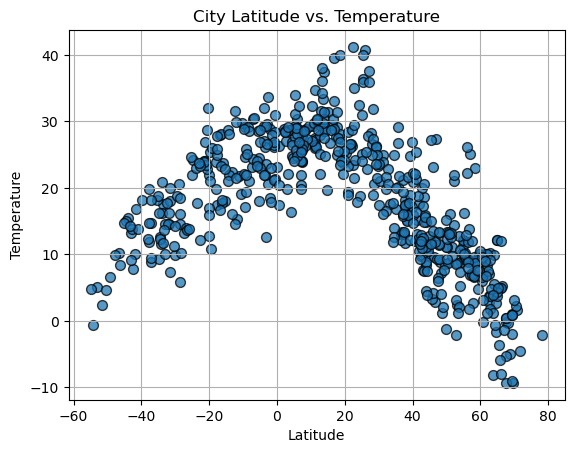

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter',x='Lat',y='Max Temp',grid=True,edgecolors='black',alpha=0.75,s=50)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

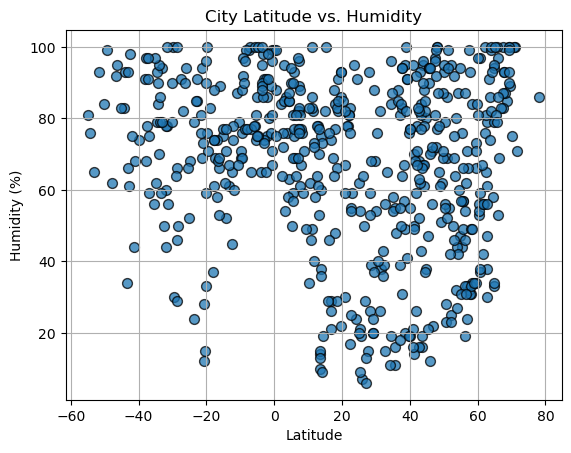

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter',x='Lat',y='Humidity',grid=True,edgecolors='black',alpha=0.75,s=50)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

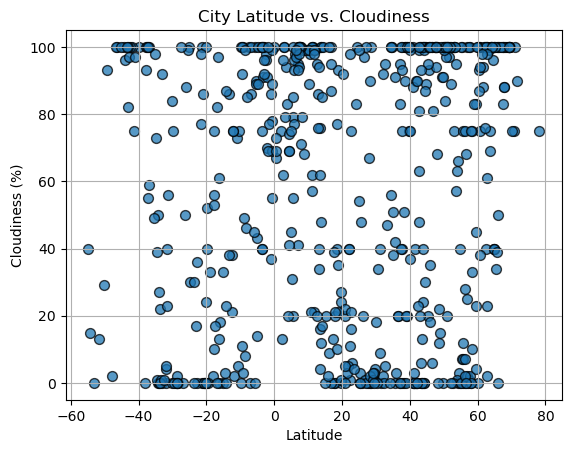

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter',x='Lat',y='Cloudiness',grid=True,edgecolors='black',alpha=0.75,s=50)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

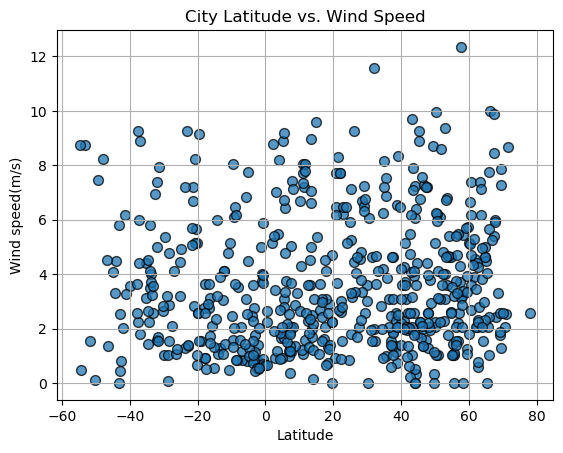

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter',x='Lat',y='Wind Speed',grid=True,edgecolors='black',alpha=0.75,s=50)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind speed(m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


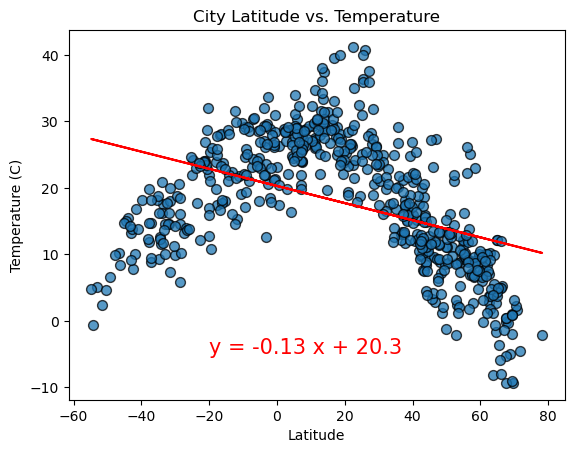

In [35]:
# Define a function to create Linear Regression plots
# latitude vs. temperature
lat_value = city_data_df['Lat']
temp_value = city_data_df['Max Temp']
(slope_temp,intercept_temp,rvalue_temp,pvalue_temp,stderr_temp) = linregress(lat_value,temp_value)
regress_values_temp = lat_value * slope_temp + intercept_temp
line_eq_temp = f"y = {str(round(slope_temp,2))} x + {str(round(intercept_temp,2))}"
plt.scatter(lat_value,temp_value,edgecolors='black',alpha=0.75,s=50)
plt.plot(lat_value,regress_values_temp,"r-")
plt.annotate(line_eq_temp,(-20,-5),fontsize=15,color='red')
plt.title("City Latitude vs. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.show()

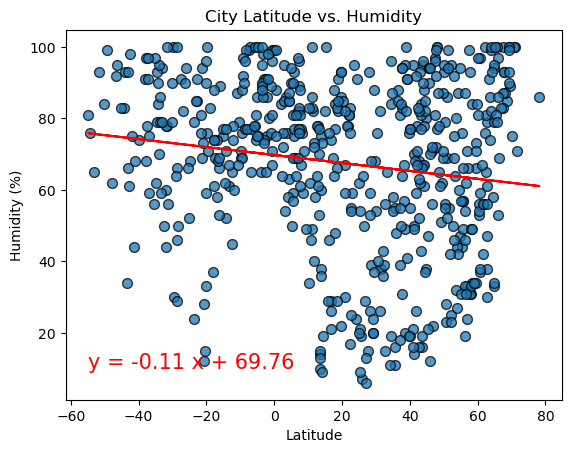

In [13]:
# Define a function to create Linear Regression plots
# latitude vs. humidity
lat_value = city_data_df['Lat']
humid_value = city_data_df['Humidity']
(slope_humid,intercept_humid,rvalue_humid,pvalue_humid,stderr_humid) = linregress(lat_value,humid_value)
regress_values_humid = lat_value * slope_humid + intercept_humid
line_eq_humid = f"y = {str(round(slope_humid,2))} x + {str(round(intercept_humid,2))}"
plt.scatter(lat_value,humid_value,edgecolors='black',alpha=0.75,s=50)
plt.plot(lat_value,regress_values_humid,"r-")
plt.annotate(line_eq_humid,(-55,10),fontsize=15,color='red')
plt.title("City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

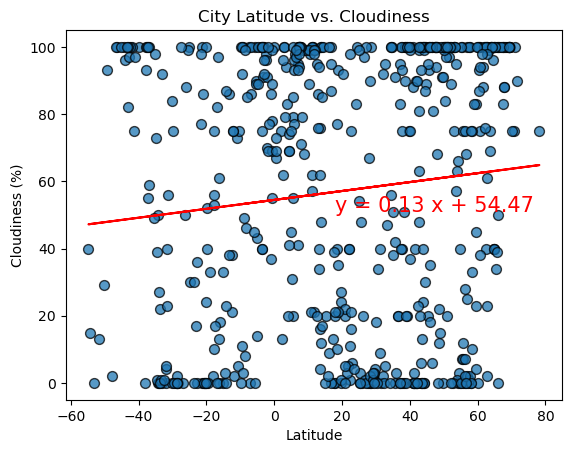

In [14]:
# Define a function to create Linear Regression plots
# latitude vs. cloud
lat_value = city_data_df['Lat']
cloud_value = city_data_df['Cloudiness']
(slope_cloud,intercept_cloud,rvalue_cloud,pvalue_cloud,stderr_cloud) = linregress(lat_value,cloud_value)
regress_values_cloud = lat_value * slope_cloud + intercept_cloud
line_eq_cloud = f"y = {str(round(slope_cloud,2))} x + {str(round(intercept_cloud,2))}"
plt.scatter(lat_value,cloud_value,edgecolors='black',alpha=0.75,s=50)
plt.plot(lat_value,regress_values_cloud,"r-")
plt.annotate(line_eq_cloud,(18,50.8),fontsize=15,color='red')
plt.title("City Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

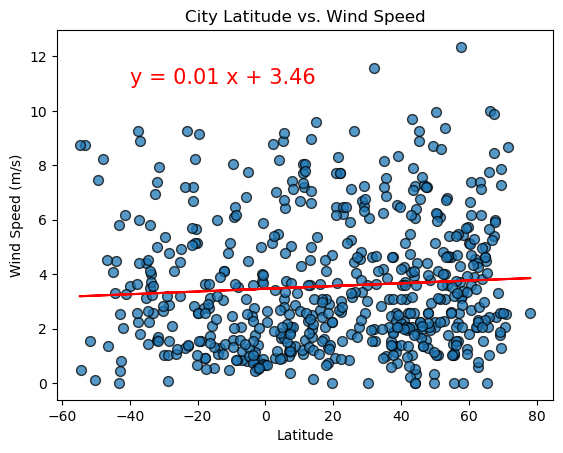

In [16]:
# Define a function to create Linear Regression plots
# latitude vs. wind speed
lat_value = city_data_df['Lat']
wind_value = city_data_df['Wind Speed']
(slope_wind,intercept_wind,rvalue_wind,pvalue_wind,stderr_wind) = linregress(lat_value,wind_value)
regress_values_wind = lat_value * slope_wind + intercept_wind
line_eq_wind = f"y = {str(round(slope_wind,2))} x + {str(round(intercept_wind,2))}"
plt.scatter(lat_value,wind_value,edgecolors='black',alpha=0.75,s=50)
plt.plot(lat_value,regress_values_wind,"r-")
plt.annotate(line_eq_wind,(-40,11),fontsize=15,color='red')
plt.title("City Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,enewetak,11.3474,162.3373,27.47,82,100,7.19,MH,1683610393
3,berezovyy,51.6667,135.7000,11.14,55,97,6.09,RU,1683610393
4,college,64.8569,-147.8028,12.18,33,40,4.63,US,1683610394
5,magadan,59.5667,150.8000,9.74,66,83,1.26,RU,1683610394
6,albany,42.6001,-73.9662,9.70,68,81,1.99,US,1683610394


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fale old settlement,-9.3852,-171.2468,29.16,76,11,6.11,TK,1683610393
1,luebo,-5.3500,21.4167,23.41,81,90,0.81,CD,1683610393
8,waitangi,-43.9535,-176.5597,15.46,93,96,4.47,NZ,1683610394
10,caleta de carquin,-11.0925,-77.6267,21.83,87,73,4.76,PE,1683610395
11,port-aux-francais,-49.3500,70.2167,6.60,99,93,7.46,TF,1683610396


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8441794449549113


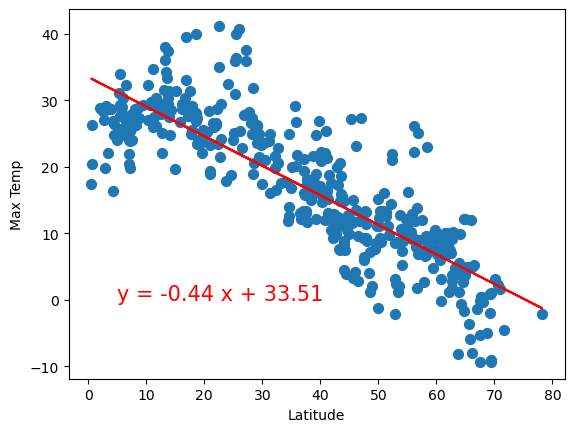

In [25]:
# Linear regression on Northern Hemisphere
lat_value_north = northern_hemi_df['Lat']
temp_value_north = northern_hemi_df['Max Temp']
(slope_north,intercept_north,rvalue_north,pvalue_north,stderr_north) = linregress(lat_value_north,temp_value_north)
regress_values_north = lat_value_north * slope_north + intercept_north
line_eq_north = f"y = {str(round(slope_north,2))} x + {str(round(intercept_north,2))}"
plt.scatter(lat_value_north,temp_value_north,s=50)
plt.plot(lat_value_north,regress_values_north,"r-")
plt.annotate(line_eq_north,(5,0),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue_north}")
plt.show()


The r-value is: 0.7617389939923732


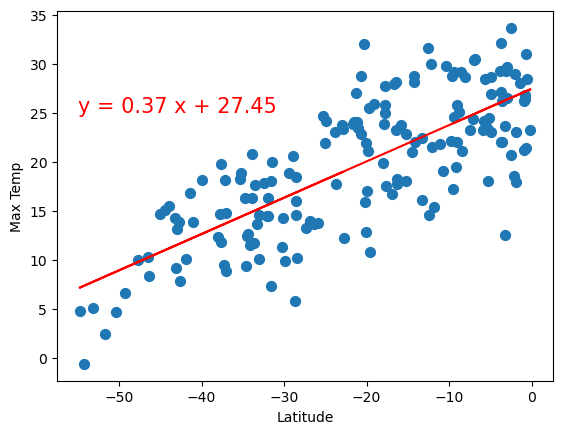

In [24]:
# Linear regression on Southern Hemisphere
lat_value_south = southern_hemi_df['Lat']
temp_value_south = southern_hemi_df['Max Temp']
(slope_south,intercept_south,rvalue_south,pvalue_south,stderr_south) = linregress(lat_value_south,temp_value_south)
regress_values_south = lat_value_south * slope_south + intercept_south
line_eq_south = f"y = {str(round(slope_south,2))} x + {str(round(intercept_south,2))}"
plt.scatter(lat_value_south,temp_value_south,s=50)
plt.plot(lat_value_south,regress_values_south,"r-")
plt.annotate(line_eq_south,(-55,25),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue_south}")
plt.show()

**Discussion about the linear relationship:** For the northern hemisphere, there is a strong correlation between latitude and temperature. As you go further north, temperature decreases. As for the southern hemisphere, there is a strong correlation between latitude and temperature. As you go further south, temperature decreases. Although the r-values of both linear regressions have a negative or a positive value, respectively, it entirely depend on perspective. But both plots and line show that when the cities that are closer to the poles, temperature decreases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.055032693745114686


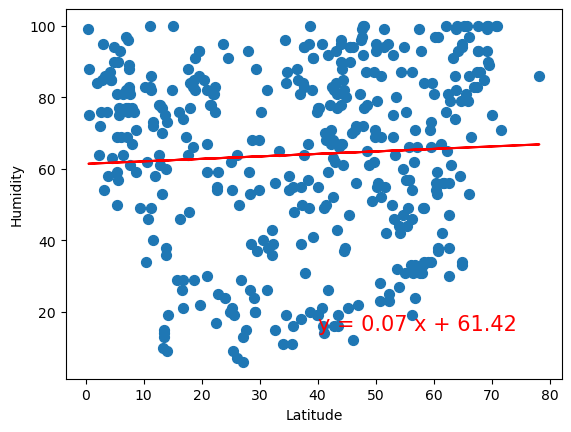

In [26]:
# Northern Hemisphere
lat_value_north = northern_hemi_df['Lat']
humidity_value_north = northern_hemi_df['Humidity']
(slope_north,intercept_north,rvalue_north,pvalue_north,stderr_north) = linregress(lat_value_north,humidity_value_north)
regress_values_north = lat_value_north * slope_north + intercept_north
line_eq_north = f"y = {str(round(slope_north,2))} x + {str(round(intercept_north,2))}"
plt.scatter(lat_value_north,humidity_value_north,s=50)
plt.plot(lat_value_north,regress_values_north,"r-")
plt.annotate(line_eq_north,(40,15),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue_north}")
plt.show()

The r-value is: 0.10363395742576963


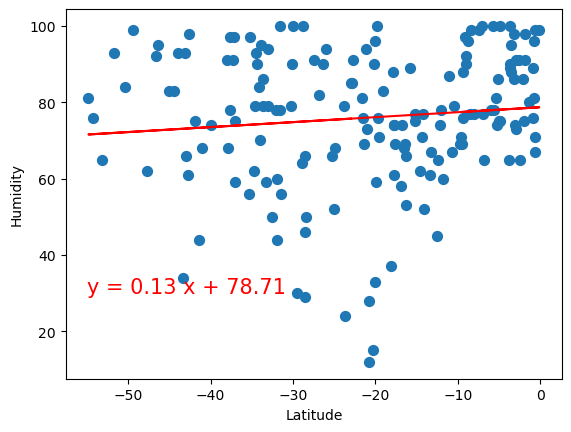

In [32]:
# Southern Hemisphere
lat_value_south = southern_hemi_df['Lat']
humidity_value_south = southern_hemi_df['Humidity']
(slope_south,intercept_south,rvalue_south,pvalue_south,stderr_south) = linregress(lat_value_south,humidity_value_south)
regress_values_south = lat_value_south * slope_south + intercept_south
line_eq_south = f"y = {str(round(slope_south,2))} x + {str(round(intercept_south,2))}"
plt.scatter(lat_value_south,humidity_value_south,s=50)
plt.plot(lat_value_south,regress_values_south,"r-")
plt.annotate(line_eq_south,(-55,30),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue_south}")
plt.show()

**Discussion about the linear relationship:** When it comes to the correlation between humidity and latitude have both weak positive correlations. As the city is located up further north, humidity weakly increases.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07238233058314639


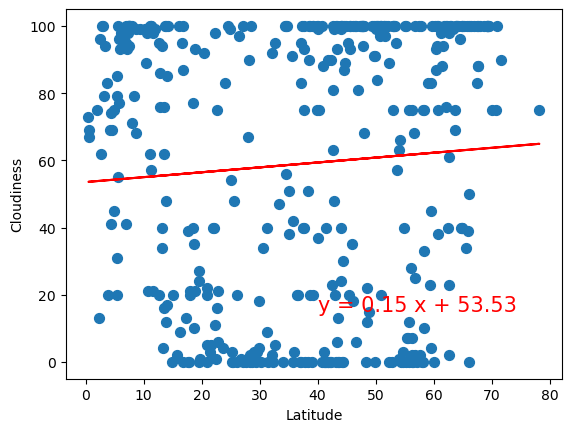

In [28]:
# Northern Hemisphere
lat_value_north = northern_hemi_df['Lat']
cloudiness_value_north = northern_hemi_df['Cloudiness']
(slope_north,intercept_north,rvalue_north,pvalue_north,stderr_north) = linregress(lat_value_north,cloudiness_value_north)
regress_values_north = lat_value_north * slope_north + intercept_north
line_eq_north = f"y = {str(round(slope_north,2))} x + {str(round(intercept_north,2))}"
plt.scatter(lat_value_north,cloudiness_value_north,s=50)
plt.plot(lat_value_north,regress_values_north,"r-")
plt.annotate(line_eq_north,(40,15),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue_north}")
plt.show()

The r-value is: 0.13655017846770645


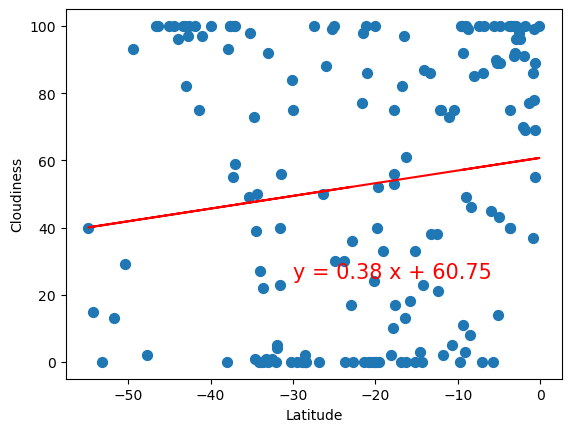

In [29]:
# Southern Hemisphere
lat_value_south = southern_hemi_df['Lat']
cloudiness_value_south = southern_hemi_df['Cloudiness']
(slope_south,intercept_south,rvalue_south,pvalue_south,stderr_south) = linregress(lat_value_south,cloudiness_value_south)
regress_values_south = lat_value_south * slope_south + intercept_south
line_eq_south = f"y = {str(round(slope_south,2))} x + {str(round(intercept_south,2))}"
plt.scatter(lat_value_south,cloudiness_value_south,s=50)
plt.plot(lat_value_south,regress_values_south,"r-")
plt.annotate(line_eq_south,(-30,25),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue_south}")
plt.show()

**Discussion about the linear relationship:** Same with the correlation between cloudiness and latitude, both hemispheres have weak positive correlations. As the city is located further north, cloudiness also weakly increases.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04453536678033791


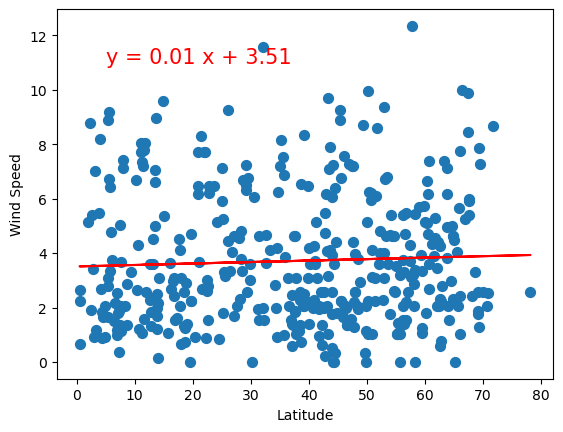

In [33]:
# Northern Hemisphere
lat_value_north = northern_hemi_df['Lat']
wind_value_north = northern_hemi_df['Wind Speed']
(slope_north,intercept_north,rvalue_north,pvalue_north,stderr_north) = linregress(lat_value_north,wind_value_north)
regress_values_north = lat_value_north * slope_north + intercept_north
line_eq_north = f"y = {str(round(slope_north,2))} x + {str(round(intercept_north,2))}"
plt.scatter(lat_value_north,wind_value_north,s=50)
plt.plot(lat_value_north,regress_values_north,"r-")
plt.annotate(line_eq_north,(5,11),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue_north}")
plt.show()

The r-value is: -0.24217974083360813


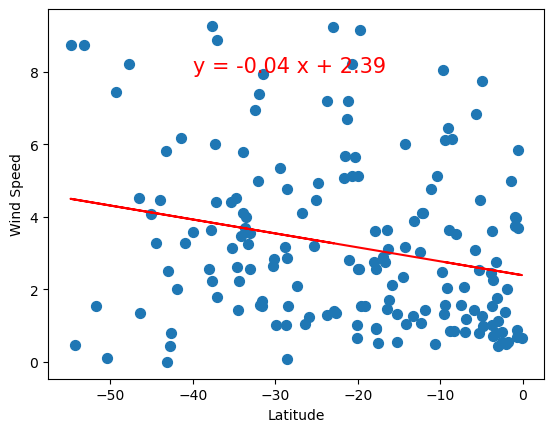

In [34]:
# Southern Hemisphere
lat_value_south = southern_hemi_df['Lat']
wind_value_south = southern_hemi_df['Wind Speed']
(slope_south,intercept_south,rvalue_south,pvalue_south,stderr_south) = linregress(lat_value_south,wind_value_south)
regress_values_south = lat_value_south * slope_south + intercept_south
line_eq_south = f"y = {str(round(slope_south,2))} x + {str(round(intercept_south,2))}"
plt.scatter(lat_value_south,wind_value_south,s=50)
plt.plot(lat_value_south,regress_values_south,"r-")
plt.annotate(line_eq_south,(-40,8),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue_south}")
plt.show()

**Discussion about the linear relationship:** Wind Speed vs Latitude correlation have correlations for both hemispheres. As you go closer to the poles, wind speed increases.